In [1]:
%pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv(r'C:\Users\Dell\OneDrive\Desktop\intership project\Data _Science_Job_Salaries\data\Data Science Job Salaries.csv')

In [3]:
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
#data preprocessing
df.drop('Unnamed: 0', axis=1, inplace=True,errors ='ignore')

In [5]:
df.shape

(607, 11)

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [7]:
df.duplicated().sum()


np.int64(42)

In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
import country_converter 

In [12]:
cc = country_converter.CountryConverter()

change country names from ISO2 to original names

 There are two features containing country names,

 "company_location" and "employee_residence"
 
 !pip install-q country_converte

In [13]:
df['company_location']=cc.convert(df['company_location'],to ='name_short')
df['employee_residence'] = cc.convert(df['employee_residence'],to = 'name_short')

In [14]:
#experience level
df['experience_level'].value_counts()

experience_level
SE    243
MI    208
EN     88
EX     26
Name: count, dtype: int64

In [15]:
df['experience_level'] = df['experience_level'].map({
   'SE':'Senior',
   'MI': 'Mid',
   'EN': 'Entry',
   'EX': 'Executive'})

In [16]:
df['experience_level'].value_counts()
print(df['experience_level'])

0         Mid
1      Senior
2      Senior
3         Mid
4      Senior
        ...  
602    Senior
603    Senior
604    Senior
605    Senior
606       Mid
Name: experience_level, Length: 565, dtype: object


In [17]:
df['employment_type'].value_counts()

employment_type
FT    546
PT     10
CT      5
FL      4
Name: count, dtype: int64

In [18]:
df['employment_type'] = df['employment_type'].map({
    'FT':'Full_time',
    'PT':'Part_time',
    'CT' : 'Contract',
    'FL' : 'Freelance'
})

In [19]:
df['employment_type'].value_counts()

employment_type
Full_time    546
Part_time     10
Contract       5
Freelance      4
Name: count, dtype: int64

In [121]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full_time,Data Scientist,70000,EUR,79833,Germany,0,Germany,L
1,2020,Senior,Full_time,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,S
2,2020,Senior,Full_time,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,M
3,2020,Mid,Full_time,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,S
4,2020,Senior,Full_time,Machine Learning Engineer,150000,USD,150000,United States,50,United States,L
5,2020,Entry,Full_time,Data Analyst,72000,USD,72000,United States,100,United States,L
6,2020,Senior,Full_time,Lead Data Scientist,190000,USD,190000,United States,100,United States,S
7,2020,Mid,Full_time,Data Scientist,11000000,HUF,35735,Hungary,50,Hungary,L
8,2020,Mid,Full_time,Business Data Analyst,135000,USD,135000,United States,100,United States,L
9,2020,Senior,Full_time,Lead Data Engineer,125000,USD,125000,New Zealand,50,New Zealand,S


In [20]:
df['company_size'].value_counts()

company_size
M    290
L    193
S     82
Name: count, dtype: int64

In [21]:
df['company_size'] = df['company_size'].map({
    'S': 'Small',
    'M':'Medium',
    'L':'Large'
})


In [22]:
df['company_size'].value_counts()

company_size
Medium    290
Large     193
Small      82
Name: count, dtype: int64

In [23]:
df.drop(['salary','salary_currency'],axis =1,inplace = True)

In [24]:
df.rename(columns={'salary_in_usd' : 'salary'},inplace = True)

In [25]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full_time,Data Scientist,79833,Germany,0,Germany,Large
1,2020,Senior,Full_time,Machine Learning Scientist,260000,Japan,0,Japan,Small
2,2020,Senior,Full_time,Big Data Engineer,109024,United Kingdom,50,United Kingdom,Medium
3,2020,Mid,Full_time,Product Data Analyst,20000,Honduras,0,Honduras,Small
4,2020,Senior,Full_time,Machine Learning Engineer,150000,United States,50,United States,Large


In [26]:
df['work_year'].value_counts()

work_year
2022    278
2021    215
2020     72
Name: count, dtype: int64

In [27]:
#Let's look at remote_ratio variable
df['remote_ratio'].value_counts()
# remote_ratio contains three categorical values: 100 means fully-remote, 0 means
#  fully-onsite and 50 stands for hybrid.


remote_ratio
100    346
0      121
50      98
Name: count, dtype: int64

In [28]:
df.rename(columns = {'remote_ratio' : 'job_type'}, inplace = True)

In [29]:
df['job_type'] = df['job_type'].map({
    100:'remote',
    50:'onsite',
    0:'hybrid',})


In [30]:
df['job_type'].value_counts()

job_type
remote    346
hybrid    121
onsite     98
Name: count, dtype: int64

In [31]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [32]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full_time,Data Scientist,79833,Germany,hybrid,Germany,Large
1,2020,Senior,Full_time,Machine Learning Scientist,260000,Japan,hybrid,Japan,Small
2,2020,Senior,Full_time,Big Data Engineer,109024,United Kingdom,onsite,United Kingdom,Medium
3,2020,Mid,Full_time,Product Data Analyst,20000,Honduras,hybrid,Honduras,Small
4,2020,Senior,Full_time,Machine Learning Engineer,150000,United States,onsite,United States,Large


Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_3496\3691460823.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax =sns.distplot(df['salary'])


Text(0.5, 1.0, 'Salary Distribution')

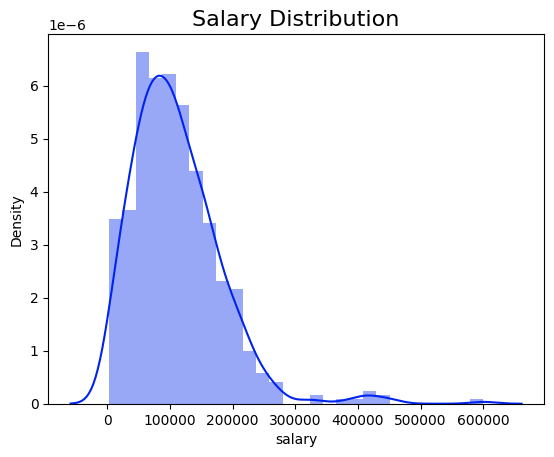

In [33]:
#salary distribution
sns.set_palette('winter')
ax =sns.distplot(df['salary'])
ax.set_title('Salary Distribution', fontdict={'fontsize': 16})

salary vs experience level

In [34]:
# mean salary of employees with different experience levels
mean_s_exp_lv =df.groupby('experience_level')['salary'].mean().sort_values()
mean_s_exp_lv

experience_level
Entry         61643.318182
Mid           87792.995192
Senior       138374.880658
Executive    199392.038462
Name: salary, dtype: float64

In [35]:
df['experience_level'].value_counts()

experience_level
Senior       243
Mid          208
Entry         88
Executive     26
Name: count, dtype: int64

Text(0.5, 1.0, 'Experience Level Vs Salary')

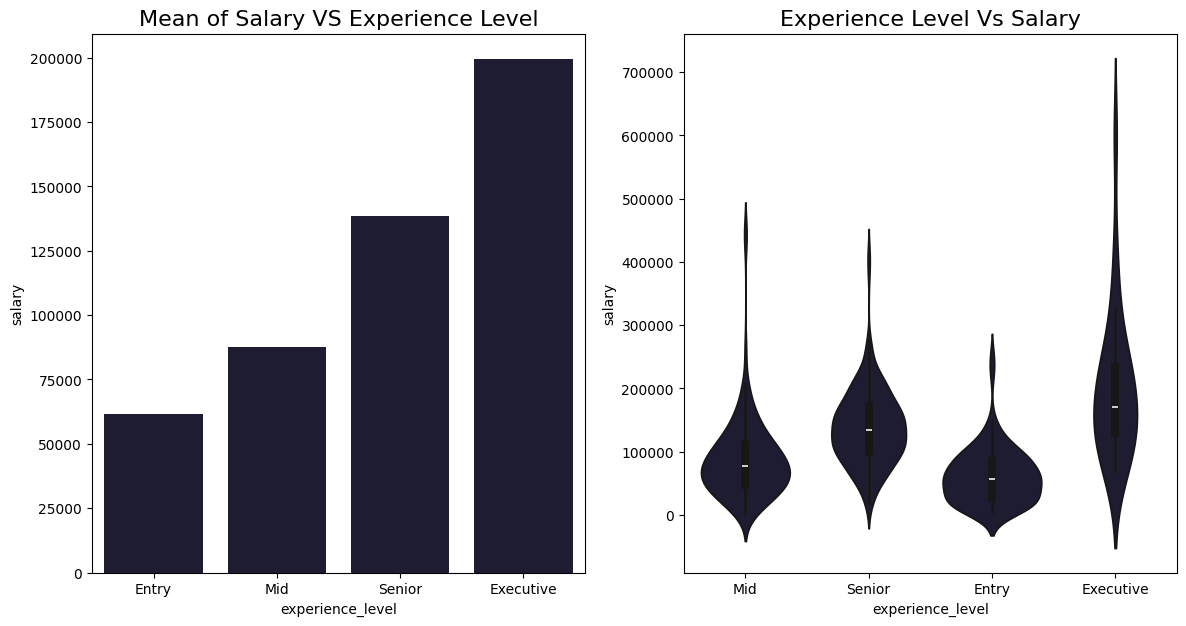

In [36]:
plt.figure(figsize=(14,7))

sns.set_palette(sns.color_palette("cubehelix", 8))

plt.subplot(1,2,1)
ax=sns.barplot(x=mean_s_exp_lv.index, y=mean_s_exp_lv)
ax.set_title("Mean of Salary VS Experience Level", fontsize=16)

plt.subplot(1,2,2)
ax = sns.violinplot(data=df, x='experience_level', y='salary')
ax.set_title('Experience Level Vs Salary',fontsize = 16)

Experience Level VS Salary:

 We see that data scientists with the experience level of Executive have the highest mean salary, about $200,000 annualy, and those with Entry level have the lowest
 mean salary, about $60,000

In [37]:

#mean salary of the employee with the different employee
mean_s_emp_type = df.groupby('employment_type')['salary'].mean().sort_values()
mean_s_emp_type
#Group all rows that have the same employment type, and tell me the average salary for each group.”

employment_type
Part_time     33070.500000
Freelance     48000.000000
Full_time    111811.838828
Contract     184575.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Employment Type Vs Salary')

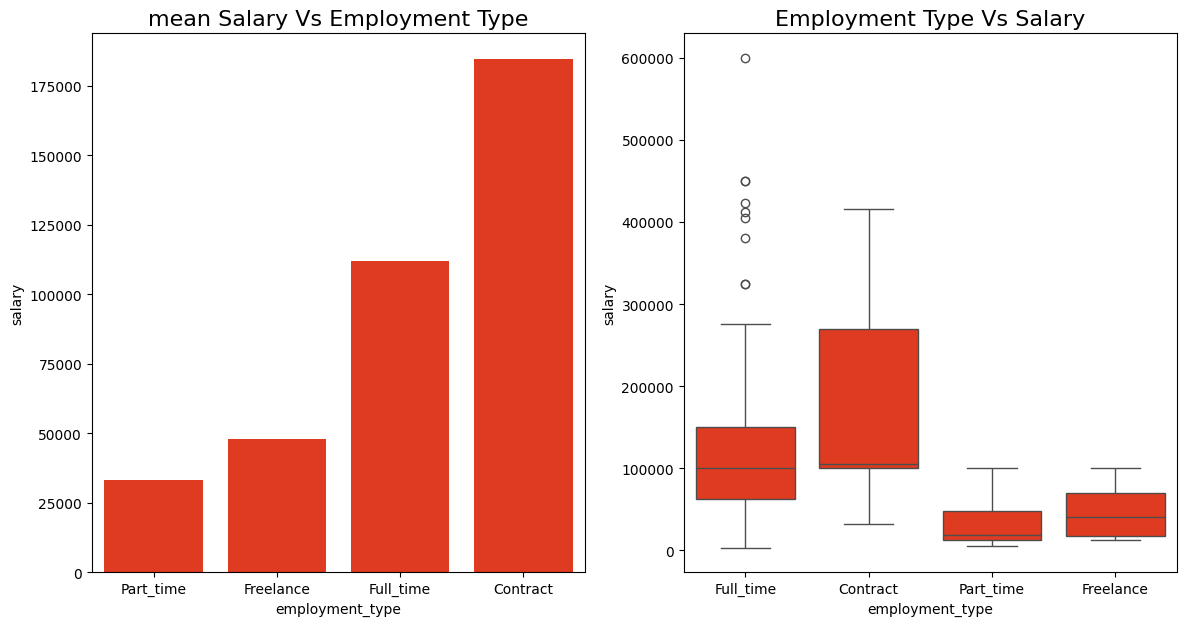

In [38]:

plt.figure(figsize =(14,7))

sns.set_palette('autumn')
plt.subplot(1,2,1)
ax = sns.barplot(x = mean_s_emp_type.index, y=mean_s_emp_type)
ax.set_title('mean Salary Vs Employment Type',fontsize =16)

plt.subplot(1,2,2)
ax = sns.boxplot(data = df, x='employment_type',y='salary')
ax.set_title("Employment Type Vs Salary",fontsize =16)

Employment Type VS Salary:

 We see that data scientists with an employment type of contract have the highest
 mean salary, about $180,000, and those who work part-time have the lowest mean
 salary, about $30,000 annualy

In [39]:

#Salary VS Company Size
# mean salary of employees from different company sizes
mean_s_cmp_size = df.groupby('company_size')['salary'].mean().sort_values()
mean_s_cmp_size


company_size
Small      77872.097561
Medium    114807.079310
Large     118213.880829
Name: salary, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

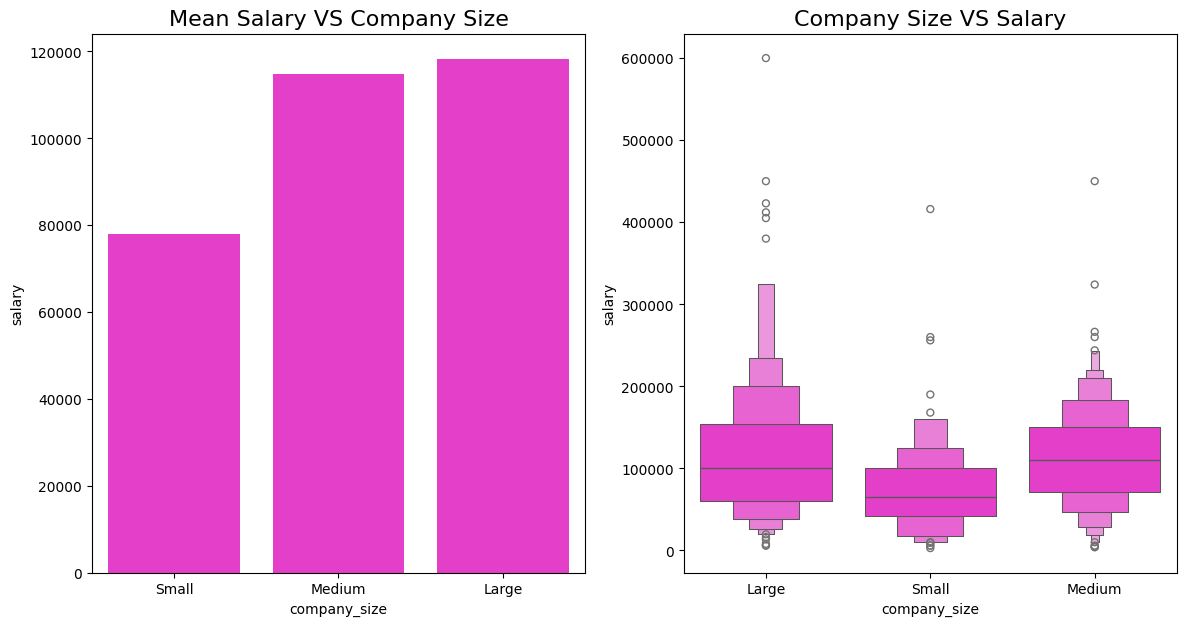

In [40]:
plt.figure(figsize=(14, 7))

sns.set_palette('spring')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size)
ax.set_title('Mean Salary VS Company Size',
fontdict={'fontsize': 16})
plt.subplot(1, 2, 2)
sns.set_palette('Set2')

ax = sns.boxenplot(data=df, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize':
16})


 Company Size VS Salary:
 
 Wesee that data scientists working at Large companies are paid the highest mean
 salary, about $120,000, and those who work at small ones have the lowest mean
 salary, about $75,000 annualy.

In [41]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [42]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full_time,Data Scientist,79833,Germany,hybrid,Germany,Large
1,2020,Senior,Full_time,Machine Learning Scientist,260000,Japan,hybrid,Japan,Small
2,2020,Senior,Full_time,Big Data Engineer,109024,United Kingdom,onsite,United Kingdom,Medium
3,2020,Mid,Full_time,Product Data Analyst,20000,Honduras,hybrid,Honduras,Small
4,2020,Senior,Full_time,Machine Learning Engineer,150000,United States,onsite,United States,Large
5,2020,Entry,Full_time,Data Analyst,72000,United States,remote,United States,Large
6,2020,Senior,Full_time,Lead Data Scientist,190000,United States,remote,United States,Small
7,2020,Mid,Full_time,Data Scientist,35735,Hungary,onsite,Hungary,Large
8,2020,Mid,Full_time,Business Data Analyst,135000,United States,remote,United States,Large
9,2020,Senior,Full_time,Lead Data Engineer,125000,New Zealand,onsite,New Zealand,Small


In [43]:
# mean salary of employees with different job types
mean_s_jtype =df.groupby('job_type')['salary'].mean().sort_values()
mean_s_jtype

job_type
onsite     80721.897959
hybrid    105785.404959
remote    120763.190751
Name: salary, dtype: float64

Text(0.5, 1.0, 'Job Type VS Salary')

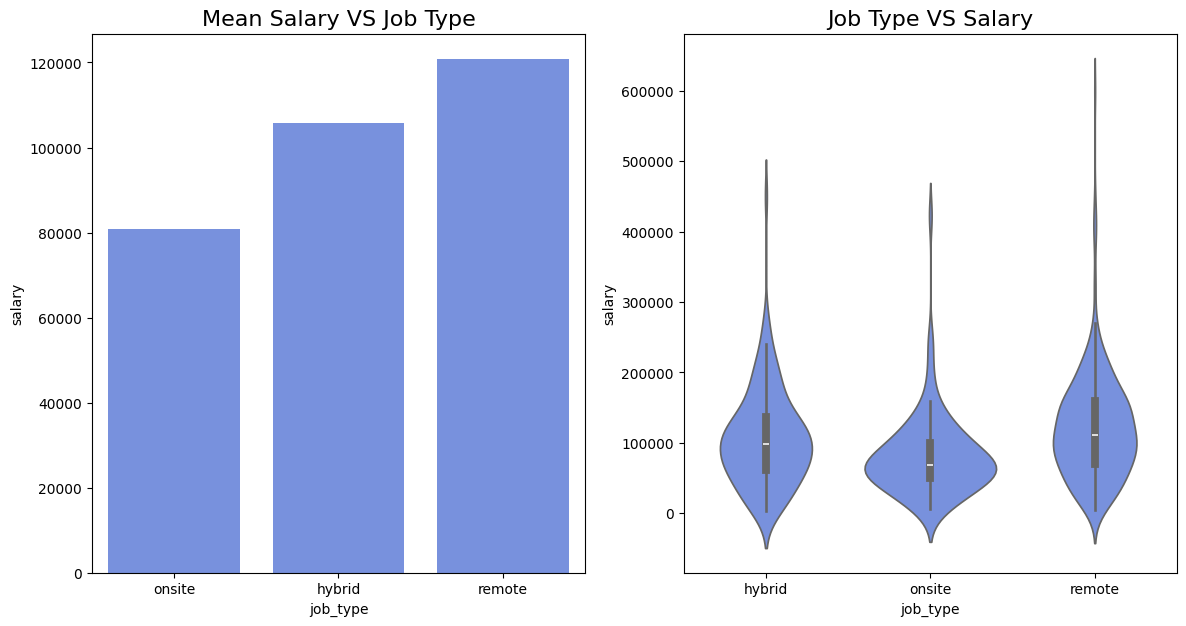

In [44]:
plt.figure(figsize=(14, 7))

sns.set_palette('coolwarm')
plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype)
ax.set_title('Mean Salary VS Job Type',fontsize =16)
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=df, x='job_type', y='salary')
ax.set_title('Job Type VS Salary',fontsize =16 )



Job Type (remote, on-site or hybrid) VS Salary:

 We see that data scientists working remotely (about $120,000) have a higher mean
 salary than those who work on-site (about $105,000), and hybrid workers have a
 lower mean salary than former two (about $80,000) annualy

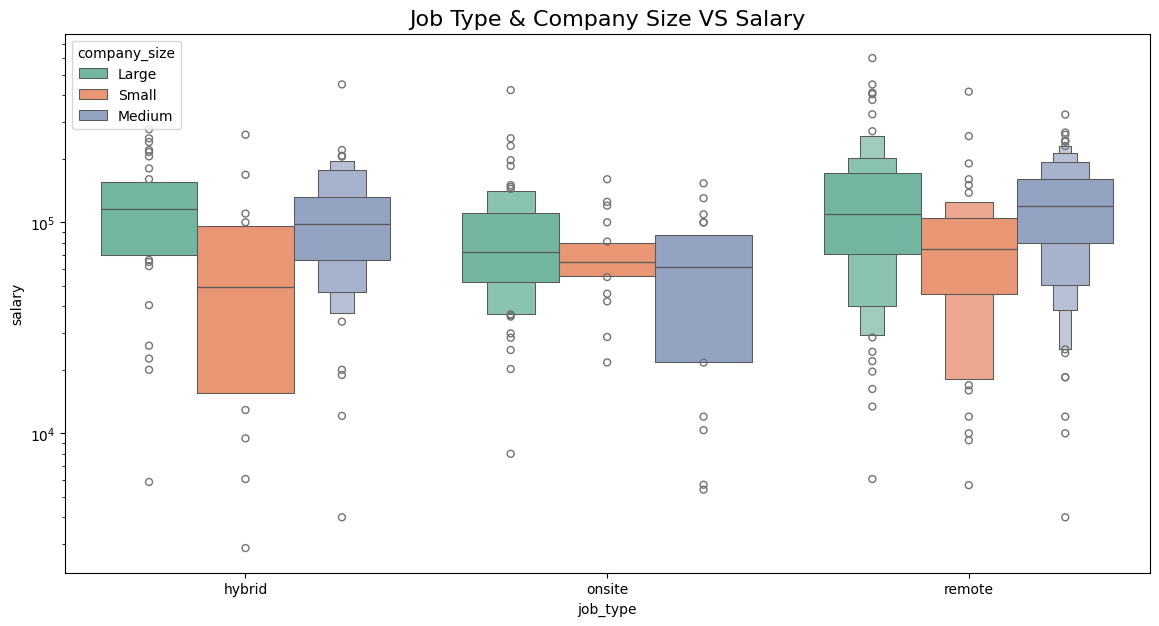

In [45]:
#job type and company size vs salary

plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='job_type', y='salary',
hue='company_size')
ax.set_title('Job Type & Company Size VS Salary',
fontdict={'fontsize': 16})
ax.set_yscale('log')


Text(0, 0.5, '')

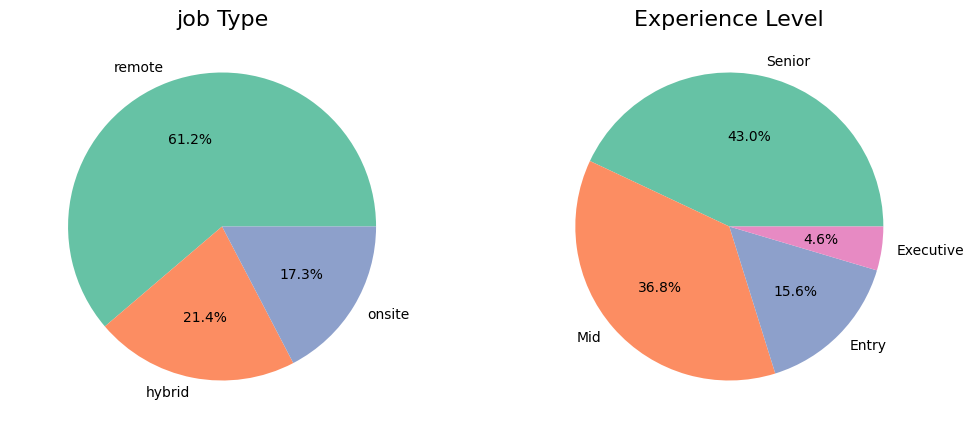

In [46]:
#Job Types and Experience Level distributions (Pie
plt.figure(figsize=(12, 5))
sns.set_palette('Set2')
#job types
plt.subplot(1,2,1)
ax = df['job_type'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
ax.set_title('job Type',fontsize =16)
ax.set_ylabel(' ')

#experience level
plt.subplot(1,2,2)
ax = df['experience_level'].value_counts().plot(kind ='pie',autopct='%1.1f%%')
ax.set_title("Experience Level", fontsize=16)
ax.set_ylabel('')

 ● Remotejobs have the highest number of openings, %.
 
 ● Share of Job openings for employees with an experience level of Senior is the
 the highest here, %

In [47]:
#  top 10 data science roles according to mean salary
top_ds_roles =df.groupby('job_title')['salary'].mean().sort_values(ascending=
False)

# ignore those ds roles which happened only once
top_ds_roles_ =pd.Series(data=list(top_ds_roles.index)).apply(lambda x: x if list(df['job_title']).count(x) > 1 else 0)
top_ds_roles_that_happened_gt_1 = top_ds_roles_[top_ds_roles_!=0][:9]
top_ds_roles_that_happened_gt_1 = top_ds_roles[top_ds_roles_that_happened_gt_1]
top_ds_roles_that_happened_gt_1

job_title
Principal Data Engineer       328333.333333
Financial Data Analyst        275000.000000
Principal Data Scientist      215242.428571
Director of Data Science      195074.000000
Data Architect                177873.909091
Applied Data Scientist        175655.000000
Analytics Engineer            175000.000000
Head of Data                  160162.600000
Machine Learning Scientist    158412.500000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 data science roles with highest number of openings')

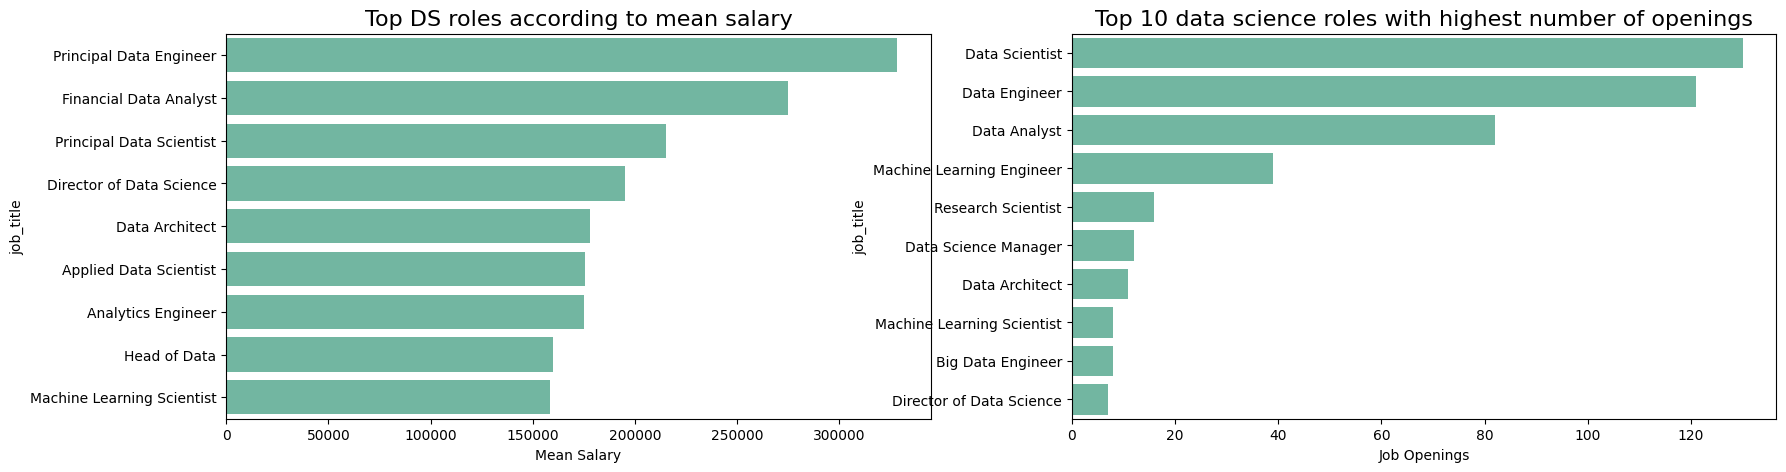

In [48]:
plt.figure(figsize=(20,5))

#top 10 datascience roles according to mean salary
plt.subplot(1,2,1)
top_ds_roles = top_ds_roles_that_happened_gt_1
ax = sns.barplot(y= top_ds_roles.index , x=top_ds_roles)
ax.set_xlabel("Mean Salary")
ax.set_title('Top DS roles according to mean salary',fontsize =16)

 # top 10 data science roles with highest number of openings
plt.subplot(1, 2, 2)
top_dr = df['job_title'].value_counts()[:10]

ax = sns.barplot(x=top_dr, y=top_dr.index)
ax.set_xlabel('Job Openings')
ax.set_title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 16})
#output:
# The top 9 job roles (by salary)
# That occurred more than once
# With their average salary



Principal Data Engineer, Financial Data Analyst and Principal Data
 Scientist are the highest paid roles according to this dataset with mean annual
 salaries of $405,000, $328,333 and $275,000 respectively.

Data Scientist, Data Engineer and Data Analyst are the top three Data
 Science roles with highest number of openings

In [49]:
# # top 10 company-locations according to mean salary

top_cmp_loc = df.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
top_cmp_loc



company_location
Russia                  157500.000000
United States           144292.993711
New Zealand             125000.000000
Israel                  119059.000000
Japan                   114127.333333
Australia               108042.666667
Canada                  100121.857143
Algeria                 100000.000000
United Arab Emirates    100000.000000
Iraq                    100000.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 opportunities having most Ds job opportunities')

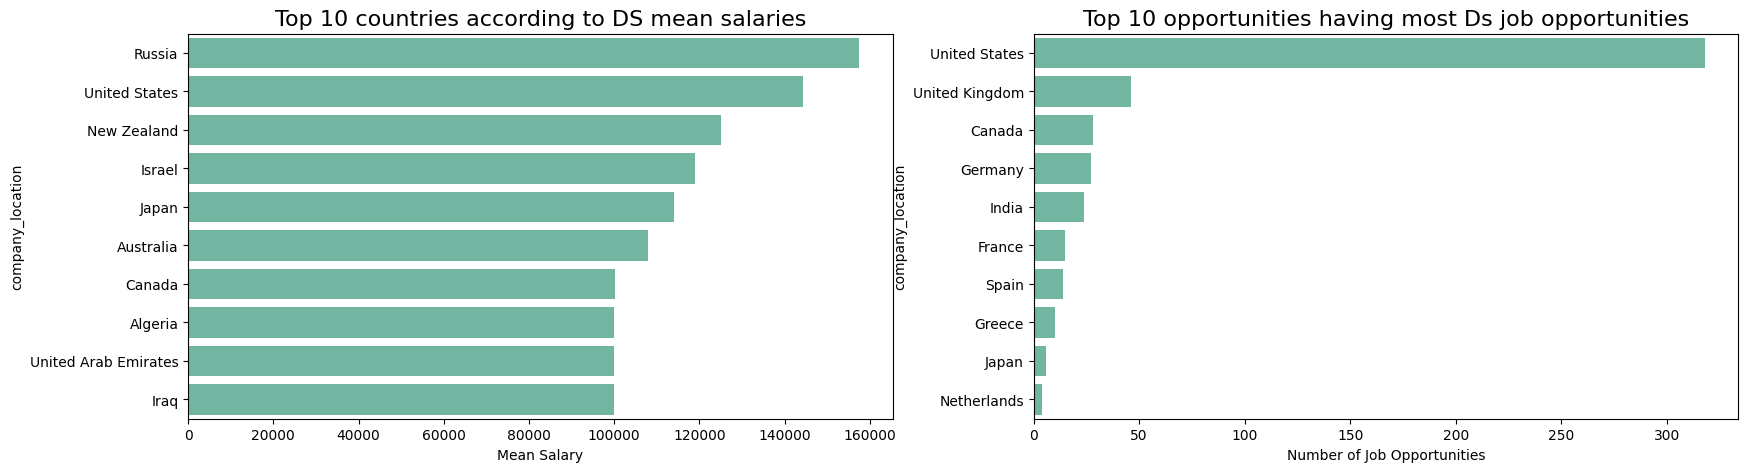

In [52]:
plt.figure(figsize =(20,5))
# top 10 company-locations according to mean salary
plt.subplot(1,2,1)
ax = sns.barplot(y = top_cmp_loc.index, x = top_cmp_loc)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 countries according to DS mean salaries',fontsize =16)

# top 10 company-locations having most job opportunities
top_cl = df['company_location'].value_counts()[:10]
plt.subplot(1,2,2)
ax = sns.barplot(x=top_cl, y=top_cl.index)
ax.set_xlabel('Number of Job Opportunities')
ax.set_title('Top 10 opportunities having most Ds job opportunities',fontsize =16)


 Russia, the United States and New Zealand are the highest paying countries
 for data science roles according to this dataset, paying mean annual salaries of
 $157,500, $144,055 and $125,000 respectively.
 
 TheUS,TheUKandCanadaare the top three countries offering highest
 number of Data Science job

In [54]:
# top 10 employee-residence according to mean salary
top_emp_residence =df.groupby('employee_residence')['salary'].mean().sort_values(ascending=False)[:10]
top_emp_residence

employee_residence
Malaysia         200000.000000
Puerto Rico      160000.000000
United States    150094.918644
New Zealand      125000.000000
Switzerland      122346.000000
Australia        108042.666667
Russia           105750.000000
Singapore        104176.500000
Japan            103537.714286
Algeria          100000.000000
Name: salary, dtype: float64

Text(0.5, 0, 'Job Openings')

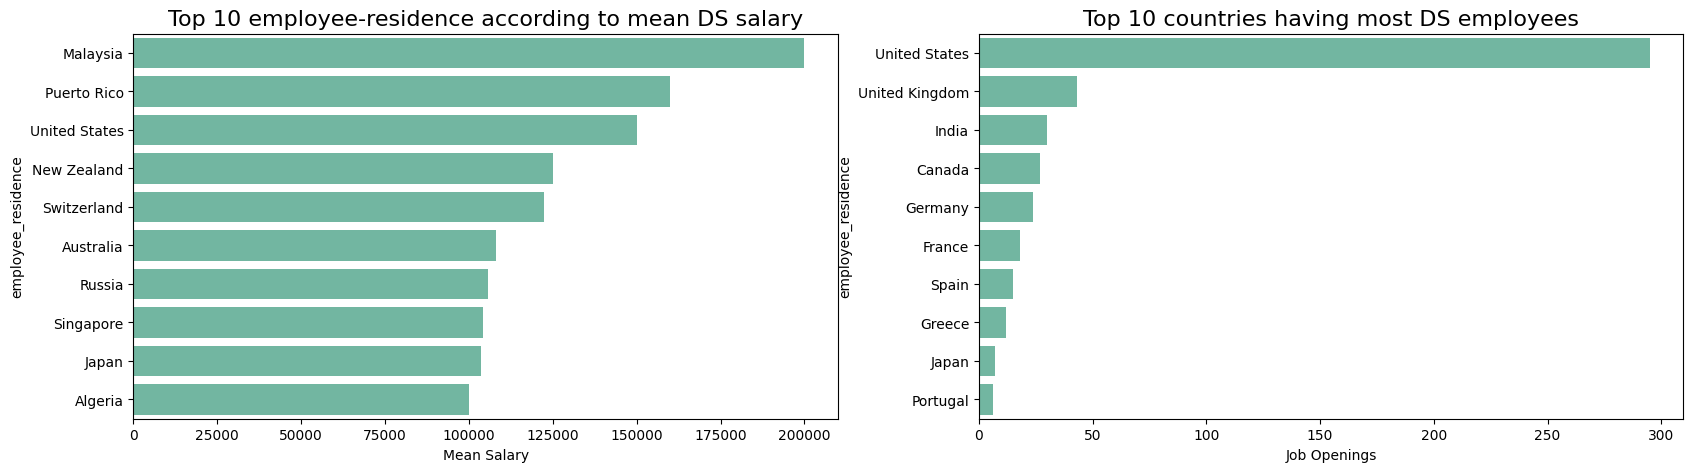

In [55]:
plt.figure(figsize=(20, 5))
# top 10 employee-residence according to mean salary
plt.subplot(1,2,1)
ax = sns.barplot(y=top_emp_residence.index,
x=top_emp_residence)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 employee-residence according to mean DS salary', fontdict={'fontsize': 16})
# top 10 employee-residence according to number of job openings
plt.subplot(1,2,2)
top_er = df['employee_residence'].value_counts()[:10]
ax = sns.barplot(x=top_er, y=top_er.index)
ax.set_title('Top 10 countries having most DS employees',fontdict={'fontsize': 16})
ax.set_xlabel('Job Openings')

Malaysia, Puerto Rico and the US are the highest paid employee-residences
 (countries where employees live) in data science roles according to this
 dataset, being paid mean annual salaries of $200,000, $160,000 and $149,194
 respectively.
 
 TheUS,the UKandIndia are the top three countires securing most Data
 Sceince job

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

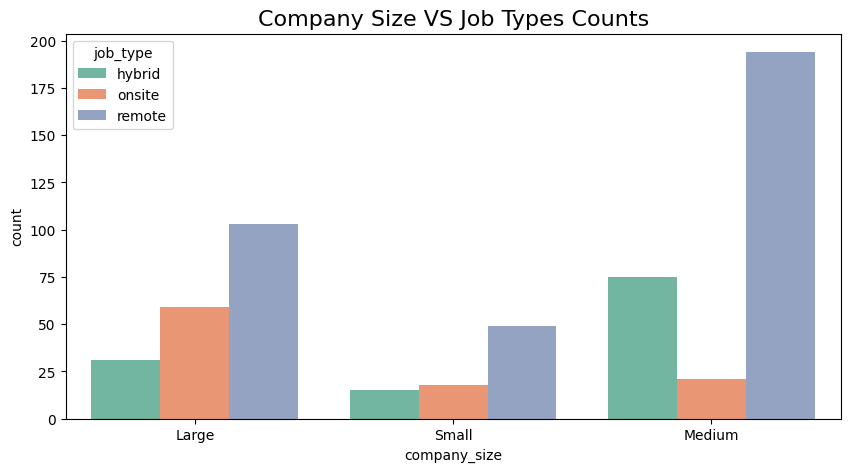

In [56]:
# Company Size VS Job Types Counts

plt.figure(figsize=(10, 5))
sns.set_palette('Set2')
ax = sns.countplot(data=df, x='company_size', hue='job_type')
ax.set_title('Company Size VS Job Types Counts',
fontdict={'fontsize': 16})



In all companies, the number of remote workers is higher than that of hybrid and
 on-site. Furthermore, the number of hybrid workers in small and large companies is
 higher than that of on-site, whereas in medium-sized companies, more people
 work on-site than hybrid

In [57]:
df.head(10
        )

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2020,Mid,Full_time,Data Scientist,79833,Germany,hybrid,Germany,Large
1,2020,Senior,Full_time,Machine Learning Scientist,260000,Japan,hybrid,Japan,Small
2,2020,Senior,Full_time,Big Data Engineer,109024,United Kingdom,onsite,United Kingdom,Medium
3,2020,Mid,Full_time,Product Data Analyst,20000,Honduras,hybrid,Honduras,Small
4,2020,Senior,Full_time,Machine Learning Engineer,150000,United States,onsite,United States,Large
5,2020,Entry,Full_time,Data Analyst,72000,United States,remote,United States,Large
6,2020,Senior,Full_time,Lead Data Scientist,190000,United States,remote,United States,Small
7,2020,Mid,Full_time,Data Scientist,35735,Hungary,onsite,Hungary,Large
8,2020,Mid,Full_time,Business Data Analyst,135000,United States,remote,United States,Large
9,2020,Senior,Full_time,Lead Data Engineer,125000,New Zealand,onsite,New Zealand,Small
